In [8]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def plot_stats(experiment_path, label, ax=None):
    eval_loss_all_runs = []
    training_loss_all_runs = []
    iterations_all_runs = []
    for run_folder in os.listdir(experiment_path):
        run_path = (os.path.join(experiment_path, run_folder))
        if os.path.isdir(run_path):
            train_info_folder = os.path.join(run_path, 'train_info')       
        # Load the .pkl file and extract the loss
        eval_loss_file = os.path.join(train_info_folder, 'nMSE_eval.pkl')       
        training_loss_file = os.path.join(train_info_folder, 'nMSE_training.pkl')
        iteration_file = os.path.join(train_info_folder, 'iterations.pkl')
        for data_file, save_list in zip([eval_loss_file,training_loss_file, iteration_file], [eval_loss_all_runs, training_loss_all_runs, iterations_all_runs]):
            with open(data_file, 'rb') as f:
                data = pickle.load(f)
                save_list.append(data)
    
    # Convert lists of stats into a numpy array (padding shorter runs with NaN)

    max_epochs = max(len(run) for run in eval_loss_all_runs)
    eval_losses_padded = np.array([np.pad(run, (0, max_epochs - len(run)), 'constant', constant_values=np.nan)
                                for run in eval_loss_all_runs])

    max_epochs = max(len(run) for run in training_loss_all_runs)
    train_losses_padded = np.array([np.pad(run, (0, max_epochs - len(run)), 'constant', constant_values=np.nan)
                                for run in training_loss_all_runs])

    iterations = np.arange(0, train_losses_padded.shape[1] * 25, 25)

    # Compute mean and variance, ignoring NaNs
    mean_eval_loss = np.nanmean(eval_losses_padded, axis=0)
    variance_eval_loss = np.nanvar(eval_losses_padded, axis=0)

    mean_train_loss = np.nanmean(train_losses_padded, axis=0)
    variance_train_loss = np.nanvar(train_losses_padded, axis=0)

    if ax is None:
        fig, ax = plt.subplots()


    ax.plot(iterations, mean_eval_loss, label=label )
    ax.fill_between(iterations, mean_eval_loss - np.sqrt(variance_eval_loss), mean_eval_loss + np.sqrt(variance_eval_loss), alpha=0.2)



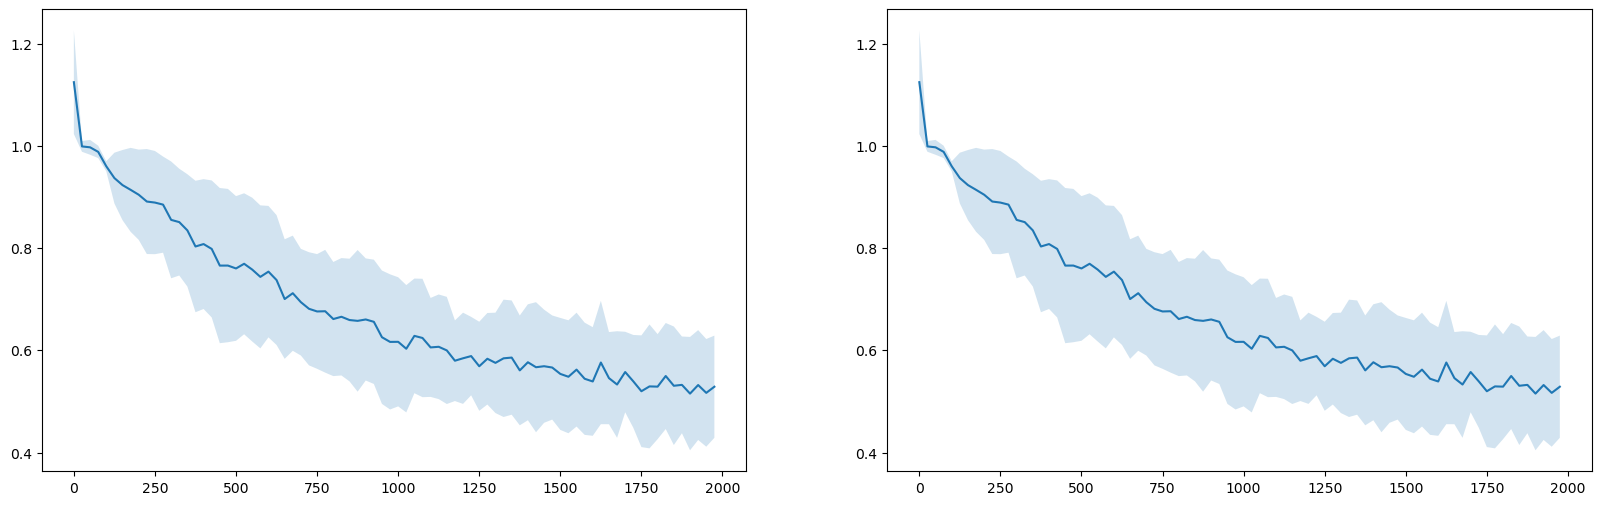

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))
experiment_paths_diffusion = [r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\high_init_diffusion_090"]
labels_diffusion = ["Diffusion K=0.90"]
for path, label in zip(experiment_paths_diffusion, labels_diffusion):
     plot_stats(path, label, ax=axs[0])

     
experiment_paths_comparison = [ r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\high_init_diffusion_090"]

labels_comparison = ["Diffusion K = 0.90"]

for path, label in zip(experiment_paths_comparison, labels_comparison):
     plot_stats(path, label, ax=axs[1])


Text(0.5, 0.01, 'Iterations')

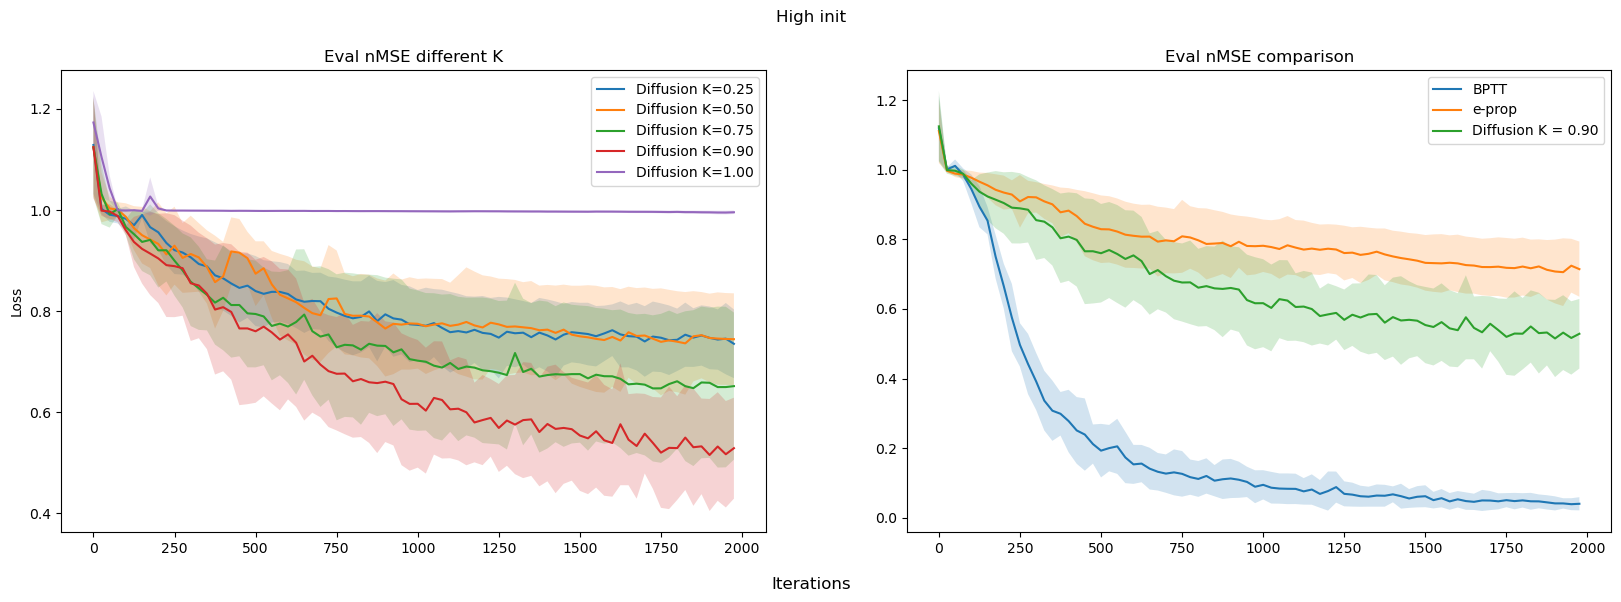

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))

experiment_paths_diffusion = [r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\high_init_diffusion_025",
                              r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\high_init_diffusion_050",
                              r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\high_init_diffusion_075",
                              r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\high_init_diffusion_090",
                              r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\high_init_diffusion_100"                            
                    
]

labels_diffusion = ["Diffusion K=0.25", "Diffusion K=0.50", "Diffusion K=0.75", "Diffusion K=0.90", "Diffusion K=1.00"]

for path, label in zip(experiment_paths_diffusion, labels_diffusion):
     plot_stats(path, label, ax=axs[0])




experiment_paths_comparison = [r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\High_init_BPTT",
                               r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\High_init_e_prop",
                               r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\high_init_diffusion_090"]

labels_comparison = ["BPTT", "e-prop", "Diffusion K = 0.90"]

for path, label in zip(experiment_paths_comparison, labels_comparison):
     plot_stats(path, label, ax=axs[1])



axs[0].set_title('Eval nMSE different K')
axs[0].legend()
axs[0].set_ylabel('Loss')
axs[1].set_title('Eval nMSE comparison')
axs[1].legend()
fig.suptitle("High init")
fig.supxlabel("Iterations")


Text(0.5, 0.01, 'Iterations')

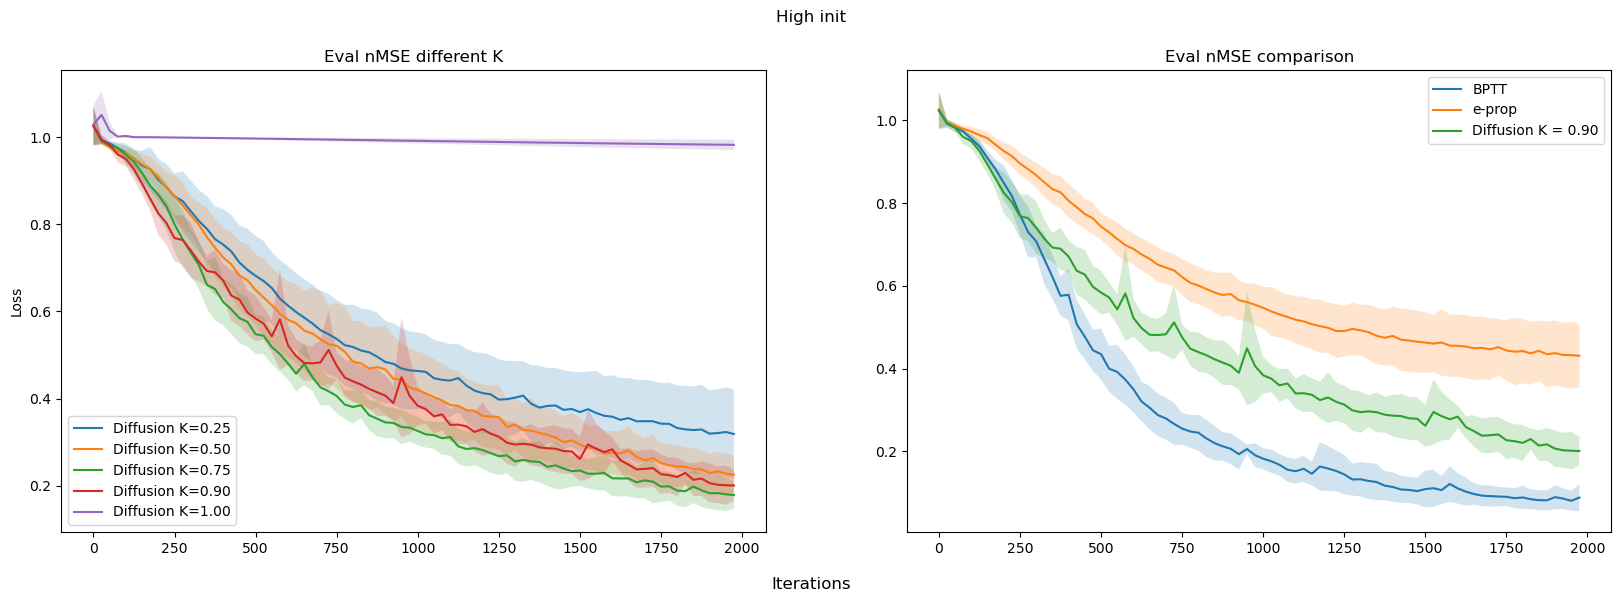

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))

experiment_paths_diffusion = [r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\old\bad_init_diffusion_k_025",
                              r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\old\bad_init_diffusion_k_050",
                              r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\old\bad_init_diffusion_k_075",
                              r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\old\bad_init_diffusion_k_090",
                              r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\old\bad_init_diffusion_k_100"                            
                    
]

labels_diffusion = ["Diffusion K=0.25", "Diffusion K=0.50", "Diffusion K=0.75", "Diffusion K=0.90", "Diffusion K=1.00"]

for path, label in zip(experiment_paths_diffusion, labels_diffusion):
     plot_stats(path, label, ax=axs[0])




experiment_paths_comparison = [r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\old\bad_init_BPTT",
                               r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\old\bad_init_eprop",
                               r"C:\Users\j1559\Documents\Tuebingen\SS_24\MasterThesis\neuromodRNNs\neuromodRNN\outputs\pattern_generation\old\bad_init_diffusion_k_090"]

labels_comparison = ["BPTT", "e-prop", "Diffusion K = 0.90"]

for path, label in zip(experiment_paths_comparison, labels_comparison):
     plot_stats(path, label, ax=axs[1])



axs[0].set_title('Eval nMSE different K')
axs[0].legend()
axs[0].set_ylabel('Loss')
axs[1].set_title('Eval nMSE comparison')
axs[1].legend()
fig.suptitle("High init")
fig.supxlabel("Iterations")

        

In [ ]:


# Convert lists of stats into a numpy array (padding shorter runs with NaN)

max_epochs = max(len(run) for run in eval_loss_all_runs)
eval_losses_padded = np.array([np.pad(run, (0, max_epochs - len(run)), 'constant', constant_values=np.nan)
                            for run in eval_loss_all_runs])

max_epochs = max(len(run) for run in training_loss_all_runs)
train_losses_padded = np.array([np.pad(run, (0, max_epochs - len(run)), 'constant', constant_values=np.nan)
                            for run in training_loss_all_runs])

iterations = np.arange(0, train_losses_padded.shape[1] * 25, 25)


In [15]:
# Compute mean and variance, ignoring NaNs
mean_eval_loss = np.nanmean(eval_losses_padded, axis=0)
variance_eval_loss = np.nanvar(eval_losses_padded, axis=0)

mean_train_loss = np.nanmean(train_losses_padded, axis=0)
variance_train_loss = np.nanvar(train_losses_padded, axis=0)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(iterations, mean_eval_loss, label='Average Loss', color='blue')
plt.fill_between(iterations, mean_eval_loss - np.sqrt(variance_eval_loss), mean_eval_loss + np.sqrt(variance_eval_loss), 
                    color='blue', alpha=0.2, label='Variance')

plt.title('Average Loss Evolution with Variance over Runs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:


def extract_and_plot_loss(experiment_folder):
    """
    Extracts the loss information from .pkl files inside each run of an experiment
    folder, and plots the average evolution of the loss and its variance over the
    different runs.
    
    Parameters:
        experiment_folder (str): Path to the experiment folder containing subfolders for each run.
    """
    loss_all_runs = []
    
    # Traverse through each run folder inside the experiment folder
    for run_folder in os.listdir(experiment_folder):
        run_path = os.path.join(experiment_folder, run_folder)
        if os.path.isdir(run_path):
            train_info_folder = os.path.join(run_path, 'train_info')
            
            # Look for .pkl files inside the train_info folder
            if os.path.exists(train_info_folder):
                for file in os.listdir(train_info_folder):
                    if file.endswith('.pkl'):
                        file_path = os.path.join(train_info_folder, file)
                        
                        # Load the .pkl file and extract the loss
                        with open(file_path, 'rb') as f:
                            data = pickle.load(f)
                            if 'loss' in data:  # Assuming loss is stored in the 'loss' key
                                loss_all_runs.append(data['loss'])
    
    # Convert list of loss into a numpy array (padding shorter runs with NaN)
    max_epochs = max(len(run_loss) for run_loss in loss_all_runs)
    losses_padded = np.array([np.pad(run_loss, (0, max_epochs - len(run_loss)), 'constant', constant_values=np.nan)
                              for run_loss in loss_all_runs])
    
    # Compute mean and variance, ignoring NaNs
    mean_loss = np.nanmean(losses_padded, axis=0)
    variance_loss = np.nanvar(losses_padded, axis=0)
    
    # Plot the average loss with variance as a shaded area
    epochs = np.arange(1, max_epochs + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, mean_loss, label='Average Loss', color='blue')
    plt.fill_between(epochs, mean_loss - np.sqrt(variance_loss), mean_loss + np.sqrt(variance_loss), 
                     color='blue', alpha=0.2, label='Variance')
    
    plt.title('Average Loss Evolution with Variance over Runs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()